In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Revathy/Desktop/Youtube/.venv/Customer_prediction/train.csv")

In [4]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [5]:
df.shape

(45211, 11)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [7]:
# Data Cleaning
# -Missing Values
# -Unstructured data
# -Data types
# -Outliers
# -Duplicates

In [8]:
# age column
df.age.values[0]

58

In [9]:
df.age.dtypes

dtype('int64')

In [10]:
df.age.isnull().sum()

0

In [11]:
df['age'].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [12]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [13]:
iqr=df['age'].quantile(0.75)-df['age'].quantile(0.25)
low_th=df['age'].quantile(0.25)-(1.5*iqr)
up_th=df['age'].quantile(0.75)+(1.5*iqr)
print(low_th,up_th)
df['age']=df['age'].clip(low_th,up_th)

10.5 70.5


In [14]:
df.age.describe()

count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

In [15]:
df.age.dtypes

dtype('float64')

In [16]:
#job column
df.job.values[0]

'management'

In [17]:
df.job.dtypes

dtype('O')

In [18]:
df.job.isnull().sum()

0

In [19]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [20]:
#Marital column
df.marital.values[0]

'married'

In [21]:
df.marital.dtypes

dtype('O')

In [22]:
df.marital.isnull().sum()

0

In [23]:
#education_qual
df.education_qual.values[0]

'tertiary'

In [24]:
df.education_qual.dtypes

dtype('O')

In [25]:
df.education_qual.isnull().sum()

0

In [26]:
#call_type
df.call_type

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: call_type, Length: 45211, dtype: object

In [27]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [28]:
df.call_type.value_counts()

call_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [29]:
#day column
df.day.values[0]

5

In [30]:
df.day.dtypes

dtype('int64')

In [31]:
df.day.isnull().sum()

0

In [32]:
df.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [33]:
iqr1=df['day'].quantile(0.75)-df['day'].quantile(0.25)
low_th1=df['day'].quantile(0.25)-(1.5*iqr1)
up_th1=df['day'].quantile(0.75)+(1.5*iqr1)
print(low_th,up_th)


10.5 70.5


In [34]:
#month column
df.mon.values[0]

'may'

In [35]:
df.mon.dtypes

dtype('O')

In [36]:
df.mon.isnull().sum()

0

In [37]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [38]:
df.mon.value_counts()

mon
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [39]:
#Duration column
df.dur.values[0]

261

In [40]:
df.dur.dtypes

dtype('int64')

In [41]:
df.dur.isnull().sum()

0

In [42]:
df.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [43]:
iqr_dur=df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
low_th_dur=df['dur'].quantile(0.25)-(1.5*iqr_dur)
up_th_dur=df['day'].quantile(0.75)+(1.5*iqr_dur)
print(low_th_dur,up_th_dur)
df['dur']=df['dur'].clip(low_th_dur,up_th_dur)

-221.0 345.0


In [44]:
df.dur.describe()

count    45211.000000
mean       196.352967
std        108.931603
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        345.000000
Name: dur, dtype: float64

In [45]:
#num_calls column
df.num_calls.values[0]

1

In [46]:
df.num_calls.dtypes

dtype('int64')

In [47]:
df.num_calls.isnull().sum()

0

In [48]:
df.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [49]:
#prev_outcome column
df.prev_outcome.values[0]

'unknown'

In [50]:
df.prev_outcome.dtypes

dtype('O')

In [51]:
df.prev_outcome.isnull().sum()

0

In [52]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [53]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [55]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [56]:
df['y']=df['y'].map({'yes':1,'no':0})

In [57]:
#EDA
#Age
df.age.dtype


dtype('float64')

<Axes: xlabel='y'>

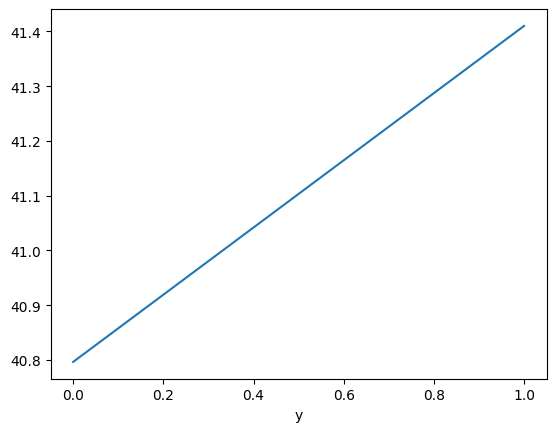

In [58]:
df.groupby('y')['age'].mean().plot()

In [59]:
#job
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [60]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

<Axes: xlabel='job'>

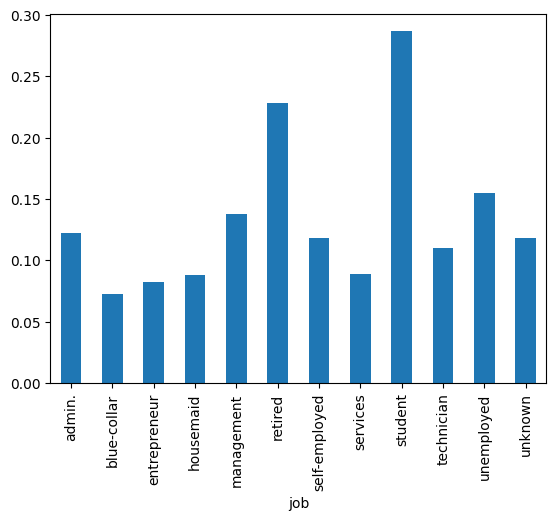

In [61]:
j=df.groupby('job')['y'].mean()
j.plot.bar()

In [62]:
df.job=df.job.map({'blue-collar':11,'management':10,'technician':9,'admin.':8,'services':7,'retired':6,'self-employed':5,'entrepreneur':4,'unemployed':3,'housemaid':2,'student':1,'unknown':0})

In [63]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,10,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,9,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,4,married,secondary,unknown,5,may,76,1,unknown,0
3,47.0,11,married,unknown,unknown,5,may,92,1,unknown,0
4,33.0,0,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,married,tertiary,cellular,17,nov,345,3,unknown,1
45207,70.5,6,divorced,primary,cellular,17,nov,345,2,unknown,1
45208,70.5,6,married,secondary,cellular,17,nov,345,5,success,1
45209,57.0,11,married,secondary,telephone,17,nov,345,4,unknown,0


<Axes: xlabel='marital'>

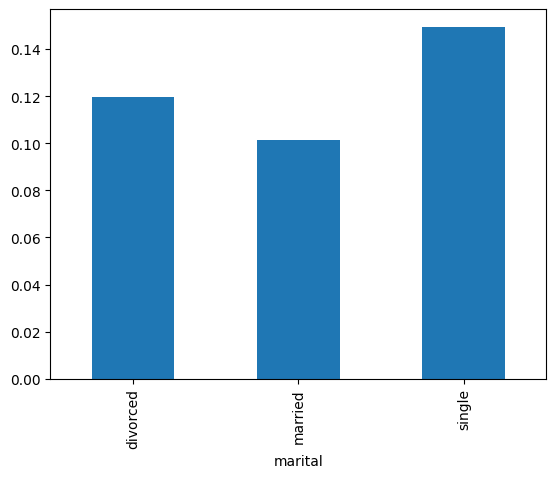

In [64]:
#marital
marital=df.groupby('marital')['y'].mean()
marital.plot.bar()

In [65]:
df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [66]:
df.marital=df.marital.map({'married':2,'single':1,'divorced':0})

<Axes: xlabel='education_qual'>

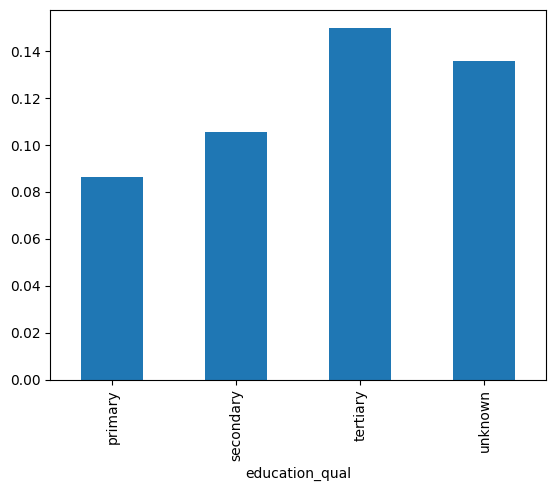

In [67]:
#education_qual
education=df.groupby('education_qual')['y'].mean()
education.plot.bar()


In [68]:
df.education_qual.value_counts()

education_qual
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [69]:
df.education_qual=df.education_qual.map({'secondary':3,'tertiary':2,'primary':1,'unknown':0})

In [70]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,10,2,2,unknown,5,may,261,1,unknown,0
1,44.0,9,1,3,unknown,5,may,151,1,unknown,0
2,33.0,4,2,3,unknown,5,may,76,1,unknown,0
3,47.0,11,2,0,unknown,5,may,92,1,unknown,0
4,33.0,0,1,0,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,2,2,cellular,17,nov,345,3,unknown,1
45207,70.5,6,0,1,cellular,17,nov,345,2,unknown,1
45208,70.5,6,2,3,cellular,17,nov,345,5,success,1
45209,57.0,11,2,3,telephone,17,nov,345,4,unknown,0


<Axes: xlabel='call_type'>

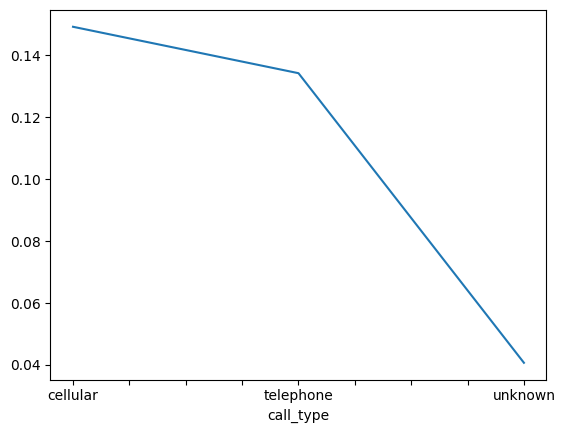

In [71]:
#call_type
call_type=df.groupby('call_type')['y'].mean()
call_type.plot()

In [72]:
df.call_type.value_counts()

call_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [73]:
df.call_type=df.call_type.map({'cellular':2,'unknown':1,'telephone':0})

<Axes: xlabel='day'>

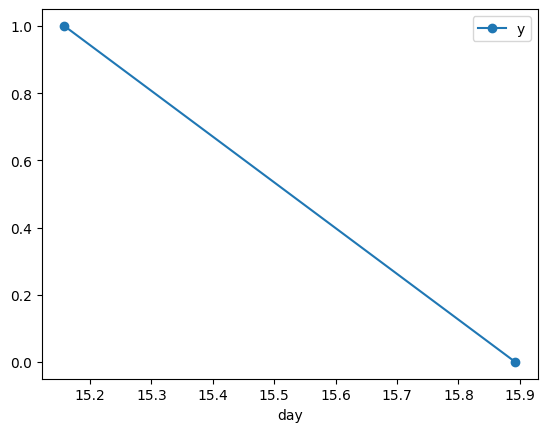

In [74]:
#day
day=df.groupby('y')['day'].mean().reset_index().sort_values(by='day')
day.plot(x='day', y='y', kind='line',marker='o')


<Axes: xlabel='mon'>

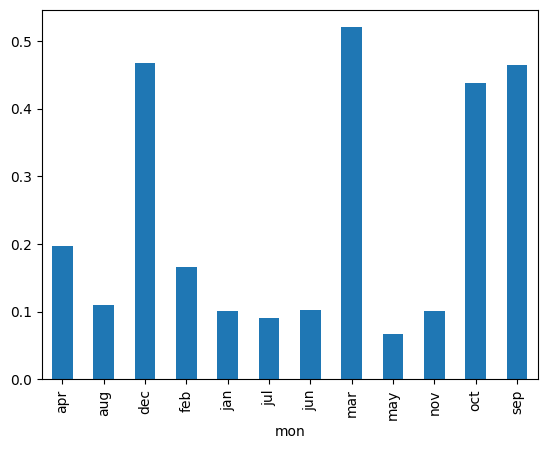

In [75]:
#month
month=df.groupby('mon')['y'].mean()
month.plot.bar()

In [76]:
df.mon.value_counts()

mon
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [77]:
df.mon=df.mon.map({'may':11,'jul':10,'aug':9,'jun':8,'nov':7,'apr':6,'feb':5,'jan':4,'oct':3,'sep':2,'mar':1,'dec':0})

In [78]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,10,2,2,1,5,11,261,1,unknown,0
1,44.0,9,1,3,1,5,11,151,1,unknown,0
2,33.0,4,2,3,1,5,11,76,1,unknown,0
3,47.0,11,2,0,1,5,11,92,1,unknown,0
4,33.0,0,1,0,1,5,11,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,2,2,2,17,7,345,3,unknown,1
45207,70.5,6,0,1,2,17,7,345,2,unknown,1
45208,70.5,6,2,3,2,17,7,345,5,success,1
45209,57.0,11,2,3,0,17,7,345,4,unknown,0


<Axes: xlabel='y'>

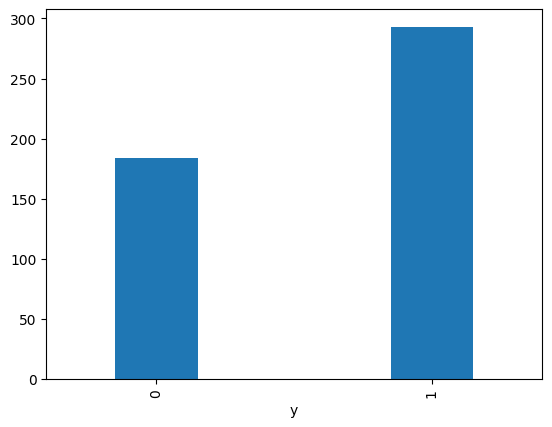

In [79]:
#duration
dur=df.groupby('y')['dur'].mean()
dur.plot.bar( width=0.3)

<Axes: xlabel='y'>

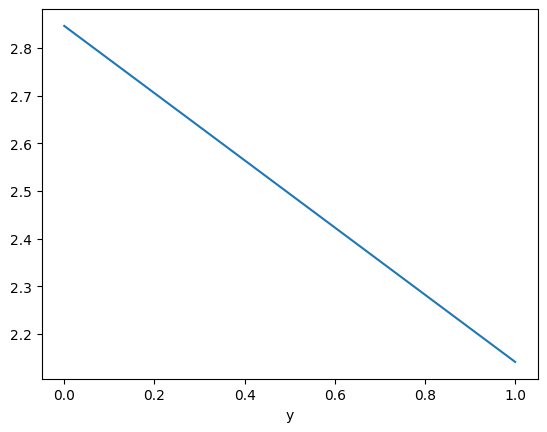

In [80]:
#num_calls
num_calls=df.groupby('y')['num_calls'].mean()
num_calls.plot()

<Axes: xlabel='prev_outcome'>

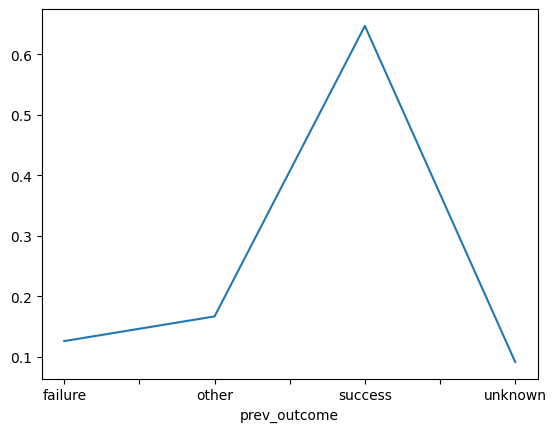

In [81]:
#prev_outcome
prev_outcome=df.groupby('prev_outcome')['y'].mean()
prev_outcome.plot()

In [82]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [83]:
df.prev_outcome=df.prev_outcome.map({'unknown':3,'failure':2,'other':1,'success':0})

In [84]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,10,2,2,1,5,11,261,1,3,0
1,44.0,9,1,3,1,5,11,151,1,3,0
2,33.0,4,2,3,1,5,11,76,1,3,0
3,47.0,11,2,0,1,5,11,92,1,3,0
4,33.0,0,1,0,1,5,11,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,2,2,2,17,7,345,3,3,1
45207,70.5,6,0,1,2,17,7,345,2,3,1
45208,70.5,6,2,3,2,17,7,345,5,0,1
45209,57.0,11,2,3,0,17,7,345,4,3,0


In [85]:
#split
from sklearn.model_selection import train_test_split
x=df.loc[:,df.columns!='y']
y=df.loc[:,'y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [86]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((36168, 10), (36168,), (9043, 10), (9043,))

In [87]:
df.y.value_counts()/len(df.y)

y
0    0.883015
1    0.116985
Name: count, dtype: float64

In [88]:
#Imbalance learning
from imblearn.combine import SMOTEENN
smoteenn=SMOTEENN(random_state=7)
x_train_cc,y_train_cc=smoteenn.fit_resample(x_train,y_train)


In [89]:
y_train_cc.value_counts()/len(y_train_cc)


y
1    0.565262
0    0.434738
Name: count, dtype: float64

In [90]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)
model.score(x_test,y_test)

c:\Users\Revathy\Desktop\Youtube\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7200044233108481

In [91]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8160418482999128

In [92]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)
model.score(x_test,y_test)

0.8104611301559217

In [93]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8850281727931312

In [94]:
#Finding Hyper Parameter
from sklearn.model_selection import cross_val_score
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]:
    model=DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train_cc,y_train_cc)
    train_score=model.score(x_test,y_test)
    cross_val=np.mean(cross_val_score(model,x_train_cc,y_train_cc,cv=10))
    print(f"Depth :{depth},cross_val_score:{cross_val},train_score:{train_score}")

Depth :1,cross_val_score:0.7881189948263119,train_score:0.6462457149176158
Depth :2,cross_val_score:0.8091648189209165,train_score:0.5724870065243834
Depth :3,cross_val_score:0.8730413895048041,train_score:0.7224372442773416
Depth :4,cross_val_score:0.899390243902439,train_score:0.7369235873050979
Depth :5,cross_val_score:0.9066149297856615,train_score:0.7400199048988167
Depth :6,cross_val_score:0.9135624538063564,train_score:0.750414685392016
Depth :7,cross_val_score:0.9197154471544715,train_score:0.7794979542187327
Depth :8,cross_val_score:0.9265336289726536,train_score:0.77109366360721
Depth :9,cross_val_score:0.9311345158906136,train_score:0.7830366028972686
Depth :10,cross_val_score:0.9338322246858832,train_score:0.7864646688046002
Depth :11,cross_val_score:0.937749445676275,train_score:0.7913303107375871
Depth :12,cross_val_score:0.9395417590539541,train_score:0.7969700320690036
Depth :13,cross_val_score:0.941888396156689,train_score:0.801172177374765
Depth :14,cross_val_score:0.

In [116]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=37)
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)
model.score(x_test,y_test)

0.8120092889527811

In [117]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8862419700214133

In [99]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)
model.score(x_test,y_test)

0.8157691031737255

In [100]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8872190630923369

In [108]:
#Finding Hyper Parameter
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 3, max_features = "sqrt")
for i in [100, 200, 500, 800, 1200, 1400]:
    model = RandomForestClassifier(n_estimators = i, max_depth = 3, max_features = "sqrt")
    cross_score = np.mean(cross_val_score(model, x_train_cc, y_train_cc, cv = 10))
    print(f"N: {i}, Cross-Val Score: {cross_score}")

N: 100, Cross-Val Score: 0.9041574279379156
N: 200, Cross-Val Score: 0.9042682926829269
N: 500, Cross-Val Score: 0.9046563192904656
N: 800, Cross-Val Score: 0.9049150036954916
N: 1200, Cross-Val Score: 0.9050073909830008
N: 1400, Cross-Val Score: 0.9051552106430154


In [109]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1400, max_depth = 3, max_features = "sqrt")
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)
model.score(x_test,y_test)

0.7292933760920048

In [110]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8224027858386536

In [111]:
#XgBoost
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)
model.score(x_test,y_test)

0.8204135795643038

In [112]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8901366526856989

In [113]:
#Finding Hyper Parameter
from xgboost import XGBClassifier

for lamb in [0.001, 0.05, 0.1, 0.2,0.21,0.23,0.25,0.27,0.28,0.3,0.35,0.4]:
    model = XGBClassifier(learning_rate = lamb)
    cross_score = np.mean(cross_val_score(model, x_train_cc, y_train_cc, cv = 10))
    print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")


Lambda: 0.001, Cross-Val Score: 0.5652623798965262
Lambda: 0.05, Cross-Val Score: 0.9388026607538802
Lambda: 0.1, Cross-Val Score: 0.9472468588322245
Lambda: 0.2, Cross-Val Score: 0.9551552106430155
Lambda: 0.21, Cross-Val Score: 0.9551736881005175
Lambda: 0.23, Cross-Val Score: 0.9557280118255729
Lambda: 0.25, Cross-Val Score: 0.9568181818181817
Lambda: 0.27, Cross-Val Score: 0.9569660014781967
Lambda: 0.28, Cross-Val Score: 0.9583333333333334
Lambda: 0.3, Cross-Val Score: 0.9584996304508501
Lambda: 0.35, Cross-Val Score: 0.9586844050258685
Lambda: 0.4, Cross-Val Score: 0.9601810790835181


In [114]:
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=0.4)
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)
model.score(x_test,y_test)

0.8251686387260865

In [115]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8934851445125649

In [ ]:
# Logistic Regression : 0.8160418482999128
# Decision Tree       : 0.8862419700214133
# Random Forest       : 0.8224027858386536
# XgBoost             : 0.8934851445125649

In [118]:
importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'feature': df.drop('y', axis=1).columns, 'importance': importances})
feature_importances_df['importance_abs'] = feature_importances_df['importance'].abs()
feature_importances_df = feature_importances_df.sort_values(by='importance_abs', ascending=False)
feature_importances=pd.DataFrame(feature_importances_df)
feature_importances

,feature,importance,importance_abs
7,dur,0.452242,0.452242
6,mon,0.175747,0.175747
9,prev_outcome,0.119672,0.119672
5,day,0.083127,0.083127
0,age,0.072050,0.072050
1,job,0.033387,0.033387
8,num_calls,0.020204,0.020204
3,education_qual,0.016009,0.016009
4,call_type,0.015884,0.015884
2,marital,0.011679,0.011679
